In [44]:
import requests
import os
import re

#url when using vpn
url = '****'  

output_dir = 'nautilus_testiraj'
os.makedirs(output_dir, exist_ok=True)

def extract_base64_from_response(response_xml):
    #regex to find base64 data
    base64_pattern = r'Value&gt;(.*?)&lt;/Value&gt'
    base64_data = re.findall(base64_pattern, response_xml)
    
    if base64_data:
        #last match of regex is base64
        return base64_data[-1] 
    else:
        return None

app_ids_file = 'test_nautilus.txt'  
with open(app_ids_file, 'r') as file:
    app_ids = file.read().splitlines()

for app_id in app_ids:
    #modify xml template to change _TYPEID_ to ID&quot;&gt;111&lt and  __NUMRECORDS__ to MaxRows=&quot;1&quot
    
    xml_template = f'''<?xml version="1.0" encoding="utf-8"?>
    <soap:Envelope xmlns:soap="http://schemas.xmlsoap.org/soap/envelope/"
        xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
        xmlns:xsd="http://www.w3.org/2001/XMLSchema">
        <soap:Body>
            <ProcessRequest xmlns="http://tempuri.org/">
                <fiAPIPacket>
                    &lt;fiAPI xmlns=&quot;http://integration.fiapi.com&quot;
                    xmlns:xsi=&quot;http://www.w3.org/2001/XMLSchema-instance&quot;
                    xsi:schemaLocation=&quot;http://integration.fiapi.com
                    fiDocumentInquiry.xsd&quot;&gt;&lt;fiHeader&gt;&lt;Service&gt;&lt;DateTime&gt;2024-05-29T12:50:25&lt;/DateTime&gt;&lt;UUID&gt;971cdee7-142f-4e12-ae09-669a0958a454&lt;/UUID&gt;&lt;/Service&gt;&lt;Security&gt;&lt;AuthenticationMaterial&gt;&lt;PrincipalPWD&gt;password&lt;/PrincipalPWD&gt;&lt;/AuthenticationMaterial&gt;&lt;PrincipalID&gt;manager&lt;/PrincipalID&gt;&lt;/Security&gt;&lt;Client&gt;&lt;VendorID&gt;&lt;/VendorID&gt;&lt;AppID&gt;{app_id}&lt;/AppID&gt;&lt;OrgID
                    /&gt;&lt;/Client&gt;&lt;DataSource&gt;FiApiado&lt;/DataSource&gt;&lt;/fiHeader&gt;&lt;Request
                    TypeOfRequest=&quot;DocumentInquiryRq&quot; RequestID=&quot;1&quot;
                    Echo=&quot;1&quot; MaxRows=&quot;30&quot;&gt;&lt;Type
                    Type=&quot;ID&quot;&gt;133&lt;/Type&gt;&lt;Condition&gt;&lt;Detail&gt;Application #&lt;/Detail&gt;&lt;Operator&gt;Equal&lt;/Operator&gt;&lt;Value&gt;{app_id}&lt;/Value&gt;&lt;/Condition&gt;&lt;RequestData
                    ID=&quot;1&quot; Name=&quot;1&quot; Date=&quot;1&quot; Class=&quot;1&quot;
                    Type=&quot;1&quot;&gt;&lt;Detail
                    MultiReplace=&quot;*&quot;&gt;*&lt;/Detail&gt;&lt;Page
                    Format=&quot;PDF&quot;&gt;*&lt;/Page&gt;&lt;/RequestData&gt;&lt;/Request&gt;&lt;/fiAPI&gt;</fiAPIPacket>
            </ProcessRequest>
        </soap:Body>
    </soap:Envelope>'''

    response = requests.post(url, headers={'Content-Type': 'text/xml'}, data=xml_template)

    if response.status_code == 200:
        base64_data = extract_base64_from_response(response.text)
        if base64_data is not None and base64_data != '' and base64_data != app_id:
            #save to a file
            base64_output_file = os.path.join(output_dir, f'{app_id}_base64_662_data.txt')
            with open(base64_output_file, 'w') as file:
                file.write(base64_data)
            print(f'Saved base64 data for app ID {app_id} to:', base64_output_file)
        else:
            print(f'Base64 data not found for app ID {app_id}')
    else:
        print(f'Request failed with status code {response.status_code} for app ID {app_id}')


Saved base64 data for app ID 10584034 to: nautilus_testiraj/10584034_base64_662_data.txt


In [ ]:
import os
import requests

url = "https://document-processor-int.uat.vroom.cloud/api/v4.0/uacc/convert-data"
header_in = {'Content-Type': 'application/json'}

def post_url_params(base64_file_path, output_directory, url=url, header_in=header_in):
    try:
        with open(base64_file_path, 'r') as file:
            file_base64 = file.read().strip()

        data = {
            "data": file_base64,
            "dataType": "PDF"
        }
        
        try:
            response = requests.post(url, headers=header_in, json=data)
            if response.status_code == 200:
                response_json = response.json()
                image_url = response_json.get("url")

                if image_url:
                    image_response = requests.get(image_url)

                    if image_response.status_code == 200:
                        filename = os.path.basename(base64_file_path).replace("_base64_", "_")
                        output_path = os.path.join(output_directory, f"{os.path.splitext(filename)[0]}.pdf")

                        with open(output_path, 'wb') as image_file:
                            image_file.write(image_response.content)
                        print(f"Image successfully downloaded and saved to {output_path}")
                    else:
                        print(f"Failed to download image from URL. Status code: {image_response.status_code}")
                else:
                    print("No image URL found in the response.")
            else:
                print(f"Failed to get image URL. Status code: {response.status_code}")
                print(f"Response: {response.text}")
        except Exception as e:
            print("ERROR while posting data or handling response:", e)
    except Exception as e:
        print(f"ERROR reading file {base64_file_path}:", e)

base64_directory = "nautilus_testiraj"
output_directory = "output_pdfs_nautilus"

os.makedirs(output_directory, exist_ok=True)

for filename in os.listdir(base64_directory):
    base64_file_path = os.path.join(base64_directory, filename)
    post_url_params(base64_file_path, output_directory)


In [76]:
TotalSalesTaxRate

'/Users/srdjan/Downloads'

In [67]:
from bs4 import BeautifulSoup

def extract_fees(rawXml):
    fees_list = []
    soup = BeautifulSoup(rawXml, "xml")

    fees = soup.find('Fees')

    for fee in fees.find_all('Fee'):
        fees_list.append((fee.find('Name').text, fee.find('Amount').text))

    return fees_list

In [140]:
def extract_tax(rawXml):
    soup = BeautifulSoup(rawXml, "xml")
    tax = soup.find('TotalSalesTaxRate')
    if tax is not None:
        return tax.text
    return None

In [141]:
import pandas as pd
df = pd.read_csv('carlton.tsv',sep='\t')
df

,ApplicantState,ApplicantName,ApplicantAddress,dealer_state,AppId,carlton_tax_calc,carlton_tax_ran
0,FL,ROGER E OROZCO CARVAJAL,6690 SW 28TH ST,FL,7505480,<FeeAndSalesTaxDetails><ErrorCode>0</ErrorCode...,2022-07-14 11:34:04.350
1,NJ,SALIH TAYLOR,155 EVERGREEN PL PL,NJ,7504171,<FeeAndSalesTaxDetails><ErrorCode>0</ErrorCode...,2022-07-13 12:17:09.800
2,FL,RAFAEL SANCHEZ,6609 SW 20TH CT,FL,7503946,<FeeAndSalesTaxDetails><ErrorCode>0</ErrorCode...,2022-07-13 08:25:16.510
3,FL,EZEQUIEL ARROYO,701 23RD AVE E,FL,7503505,<FeeAndSalesTaxDetails><ErrorCode>0</ErrorCode...,2022-07-13 08:22:44.850
4,OH,SCOTT BOOTH,11554 WINDHAM PARKMAN RD,OH,7503300,<FeeAndSalesTaxDetails><ErrorCode>0</ErrorCode...,2022-07-13 14:56:38.833
...,...,...,...,...,...,...,...
95,KY,MELISSA HAMILTON,8756 KY 225,KY,7483791,<FeeAndSalesTaxDetails><ErrorCode>0</ErrorCode...,2022-07-13 14:24:20.173
96,FL,JAIRO RAMIREZ,531 SOUTHERN CHARM DR,FL,7483570,<FeeAndSalesTaxDetails><ErrorCode>0</ErrorCode...,2022-07-08 11:19:39.260
97,FL,AMY R BEAUCHAMP,1037 LEXINGTON ST,FL,7483539,<FeeAndSalesTaxDetails><ErrorCode>0</ErrorCode...,2022-07-08 15:34:56.463
98,GA,DARCY D THOMAS,625 WINNERS CIR,GA,7483508,<FeeAndSalesTaxDetails><ErrorCode>0</ErrorCode...,2022-07-07 14:35:36.227


In [142]:
df['Tax'] = df['carlton_tax_calc'].apply(extract_tax)

In [143]:
df[df['AppId'] == 7499959]

,ApplicantState,ApplicantName,ApplicantAddress,dealer_state,AppId,carlton_tax_calc,carlton_tax_ran,Tax
10,LA,ROSHALL ARY,5124 E BROOKSTOWN DR,LA,7499959,<FeeAndSalesTaxDetails><ErrorCode>21003</Error...,2022-07-13 10:25:36.510,0


In [127]:
df = df[['AppId','Tax']]
df.to_csv('tax_carlton.tsv',sep='\t',index=False)

In [70]:
df1 = df[['AppId','Fees']]

In [1]:
df1.to_csv('fee_appid.tsv',sep='\t',index=False)

NameError: name 'df1' is not defined

In [ ]:
import re
import pandas as pd
import os

#path to the TSV file
tsv_file_path = 'final_file_for_classifier.tsv'
output_file = 'carlton_parsed.tsv'
pattern = re.compile(r'Total Other Charges.*?[$|S] ([0-9,.]+)', re.DOTALL)
pattern1 = re.compile(r'Total Other Charges.*? ([0-9,.]+)', re.DOTALL)
def process_row(row):
    #extract ID from the filename (before the first '_')
    filename = row[0]
    id_match = re.match(r'^(\d+)_', filename)
    if id_match:
        document_id = id_match.group(1)
    else:
        print(f"ID could not be extracted from filename: {filename}")
        return None 

    #extract OCR data from the second column
    ocr_data = row[1]
    
    #find pattern in the OCR data
    match = pattern.search(ocr_data)
    if match:
        #extract the value and remove commas
        total_other_charges = match.group(1).replace(',', '')
    else:
        match = pattern1.search(ocr_data)
        if match:
            total_other_charges = match.group(1).replace(',', '')
        else:
            print(f"No match found in OCR data for file: {filename}")
            total_other_charges = 'N/A'

    return {'AppId': document_id, 'Fees': total_other_charges}

df = pd.DataFrame(columns=['AppId', 'Fees'])

tsv_data = pd.read_csv(tsv_file_path, sep='\t', header=None)

for index, row in tsv_data.iterrows():
    result = process_row(row)
    if result:
        #append the result to the DataFrame
        df = df.append(result, ignore_index=True)

df.to_csv(output_file, index=False,sep='\t')

print(f'Data saved to {output_file}')


In [ ]:
import re
import pandas as pd
import os


tsv_file_path = 'final_file_for_classifier.tsv'
output_file = 'carlton2_parsed.tsv'
pattern = re.compile(r'Total Other Charges.*? ([0-9,.]+) .*? Prepaid', re.DOTALL)
def process_row(row):
    #extract ID from the filename (before the first '_')
    filename = row[0]
    id_match = re.match(r'^(\d+)_', filename)
    if id_match:
        document_id = id_match.group(1)
    else:
        print(f"ID could not be extracted from filename: {filename}")
        return None 

    #extract OCR data from the second column
    ocr_data = row[1]
    
    #find pattern in the OCR data
    match = pattern.search(ocr_data)
    if match:
        #extract the value and remove commas
        total_other_charges = match.group(1).replace(',', '')
    else:
        
        print(f"No match found in OCR data for file: {filename}")
        total_other_charges = 'N/A'

    return {'AppId': document_id, 'Fees': total_other_charges}

df = pd.DataFrame(columns=['AppId', 'Fees'])


tsv_data = pd.read_csv(tsv_file_path, sep='\t', header=None)


for index, row in tsv_data.iterrows():
    result = process_row(row)
    if result:
        df = df.append(result, ignore_index=True)


df.to_csv(output_file, index=False,sep='\t')

print(f'Data saved to {output_file}')


In [97]:
def extract_fees(row):
    total = 0
    for i,j in row:
        total += float(j)
    return total
df1['total_fees'] = df1['Fees'].apply(extract_fees)

/var/folders/lh/x3hrpfns0kvft_vn9ntrvglm0000gn/T/ipykernel_92046/4016142837.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['total_fees'] = df1['Fees'].apply(extract_fees)


In [93]:
my_list= "[('Title Fees', '60'), ('Doc Fee', '0'), ('Plate Temp Tag', '5'), ('Tire Fee', '7.5'), ('Online Registration Fee', '8'), ('Registration Service Processing Fees', '0'), ('Non Taxable Fee', '0'), ('Taxable Fee', '0')]"

In [99]:
df1.to_csv('sumirano.tsv',sep='\t')

In [100]:
df2 = pd.read_csv('Carlton - ric ocr.tsv',sep='\t')

In [102]:
df_merged = pd.merge(df1,df2,on='AppId',how='inner')

In [152]:
df_ocr = pd.read_csv('Carlton - ric ocr 2 (1).tsv',sep='\t')
df_ocr

,AppId,DOCS FEES,Sales Tax,Cash Price
0,7505480,1020.86,"1,184","19,183"
1,7504171,156,926,"14,000"
2,7503946,550.84,991.13,13.990.13
3,7503505,778.09,664.25,"9,064.25"
4,7503300,285,"2,069.90","30,994.90"
...,...,...,...,...
95,7483791,422,585,"10,335"
96,7483570,450.73,"1,356.31","21,356.31"
97,7483539,965.69,697.34,"25,687.34"
98,7483508,457,"1,329.93","21,328.93"


In [155]:
df1

,AppId,Fees,total_fees
0,7505480,"[(County Flat Tax, 50), (Title Fees, 85.25), (...",165.1
1,7504171,"[(Title Fees, 60), (Doc Fee, 0), (Plate Temp T...",80.5
2,7503946,"[(County Flat Tax, 50), (Title Fees, 85.25), (...",165.1
3,7503505,"[(Title Fees, 85.25), (Registration Fees, 3), ...",115.1
4,7503300,"[(Title Fee, 15), (Local Taxes, 15), (Doc Fee,...",115.0
...,...,...,...
95,7483791,"[(Title Fees, 9), (Doc Fee, 0), (Tire Fee, 10)...",19.0
96,7483570,"[(County Flat Tax, 25), (Title Fees, 85.25), (...",140.1
97,7483539,"[(County Flat Tax, 50), (Title Fees, 85.25), (...",165.1
98,7483508,"[(Title Fee, 18), (Doc Fee, 0), (Electronic Fi...",48.0


In [153]:
df_ocr_fees = df_ocr[['AppId','DOCS FEES']]

In [159]:
df_merged = pd.merge(df1,df_ocr_fees,on='AppId',how='inner')
df_merged

,AppId,Fees,total_fees,DOCS FEES
0,7505480,"[(County Flat Tax, 50), (Title Fees, 85.25), (...",165.1,1020.86
1,7504171,"[(Title Fees, 60), (Doc Fee, 0), (Plate Temp T...",80.5,156
2,7503946,"[(County Flat Tax, 50), (Title Fees, 85.25), (...",165.1,550.84
3,7503505,"[(Title Fees, 85.25), (Registration Fees, 3), ...",115.1,778.09
4,7503300,"[(Title Fee, 15), (Local Taxes, 15), (Doc Fee,...",115.0,285
...,...,...,...,...
95,7483791,"[(Title Fees, 9), (Doc Fee, 0), (Tire Fee, 10)...",19.0,422
96,7483570,"[(County Flat Tax, 25), (Title Fees, 85.25), (...",140.1,450.73
97,7483539,"[(County Flat Tax, 50), (Title Fees, 85.25), (...",165.1,965.69
98,7483508,"[(Title Fee, 18), (Doc Fee, 0), (Electronic Fi...",48.0,457


In [160]:
df_merged.to_csv('carlton_spojeno_fees.tsv',sep='\t',index=False)

In [161]:
df_spoji1 = pd.read_csv('Carlton - fees_merged.tsv',sep='\t')
df_spoji1

,AppId,total_fees,DOCS_FEES,DIFF,doc_stamp_tax
0,7484527,644.00,"2,114.00","1,470.00",NaN
1,7486966,165.10,"1,092.00",926.90,1.0
2,7505480,165.10,"1,020.86",855.76,1.0
3,7483795,57.00,904.75,847.75,NaN
4,7499211,140.10,981.94,841.84,1.0
...,...,...,...,...,...
77,7484173,401.00,180.00,-221.00,NaN
78,7484614,401.00,167.00,-234.00,NaN
79,7495631,273.28,20.00,-253.28,NaN
80,7490984,262.92,0.00,-262.92,NaN


In [162]:
df_spoji2 = pd.read_csv('Carlton - Sheet8.tsv',sep='\t')

In [163]:
df_spoji1.dtypes

AppId              int64
total_fees       float64
DOCS_FEES         object
DIFF              object
doc_stamp_tax    float64
dtype: object

In [167]:
df_spojeno.dtypes

AppId              int64
total_fees       float64
DOCS_FEES         object
DIFF              object
doc_stamp_tax    float64
Cash Price        object
dtype: object

In [165]:
df_spojeno = pd.merge(df_spoji1,df_spoji2,on='AppId',how='inner')
df_spojeno

,AppId,total_fees,DOCS_FEES,DIFF,doc_stamp_tax,Cash Price
0,7484527,644.00,"2,114.00","1,470.00",NaN,"12,578.11"
1,7486966,165.10,"1,092.00",926.90,1.0,"27,260.68"
2,7505480,165.10,"1,020.86",855.76,1.0,"19,183"
3,7483795,57.00,904.75,847.75,NaN,"26,197.27"
4,7499211,140.10,981.94,841.84,1.0,"22,463"
...,...,...,...,...,...,...
77,7484173,401.00,180.00,-221.00,NaN,"25,021"
78,7484614,401.00,167.00,-234.00,NaN,"11,469.69"
79,7495631,273.28,20.00,-253.28,NaN,"19,987"
80,7490984,262.92,0.00,-262.92,NaN,"13,200"


In [187]:

for index,row in df_spojeno2.iterrows():
    if row['doc_stamp_tax'] == 1.0:
        new_total_fees = row['total_fees'] = row['total_fees']- 0.35 + 0.35*row['Cash Price']/100
        df_spojeno2.at[index,'total_fees'] = round(new_total_fees,2)

In [188]:
df_spojeno2

,AppId,total_fees,DOCS_FEES,doc_stamp_tax,Cash Price
0,7484527,644.00,"2,114.00",NaN,12578.11
1,7486966,260.16,"1,092.00",1.0,27260.68
2,7505480,231.89,"1,020.86",1.0,19183.00
3,7483795,57.00,904.75,NaN,26197.27
4,7499211,218.37,981.94,1.0,22463.00
...,...,...,...,...,...
77,7484173,401.00,180.00,NaN,25021.00
78,7484614,401.00,167.00,NaN,11469.69
79,7495631,273.28,20.00,NaN,19987.00
80,7490984,262.92,0.00,NaN,13200.00


In [189]:
df_spojeno2.to_csv('djubre2.tsv',sep='\t',index=False)

In [185]:
df_spojeno2 = pd.read_csv('Carlton - Sheet9 (1).tsv',sep='\t')
df_spojeno2.dtypes

AppId              int64
total_fees       float64
DOCS_FEES         object
doc_stamp_tax    float64
Cash Price        object
dtype: object

In [186]:
df_spojeno2['Cash Price'] = df_spojeno2['Cash Price'].str.replace(',','').astype(float)

In [202]:
df_spojeno2.dtypes

AppId           int64
total_fees    float64
DOCS_FEES     float64
DIFF          float64
dtype: object

In [192]:
df_spojeno2['DOCS_FEES'] = df_spojeno2['DOCS_FEES'].str.replace(',','').astype(float)

In [198]:
df_spojeno2.drop(columns='Cash Price',inplace=True)

In [201]:
df_spojeno2['DIFF'] = df_spojeno2['DOCS_FEES'] - df_spojeno2['total_fees']

In [203]:
df_spojeno2

,AppId,total_fees,DOCS_FEES,DIFF
0,7484527,644.00,2114.00,1470.00
1,7486966,260.16,1092.00,831.84
2,7505480,231.89,1020.86,788.97
3,7483795,57.00,904.75,847.75
4,7499211,218.37,981.94,763.57
...,...,...,...,...
77,7484173,401.00,180.00,-221.00
78,7484614,401.00,167.00,-234.00
79,7495631,273.28,20.00,-253.28
80,7490984,262.92,0.00,-262.92


In [289]:
average_diff = df_spojeno2['DIFF'].mean()

In [290]:
average_diff

210.1064634146342

In [292]:
df_spojeno2['DIFF'].max()

847.75

In [291]:
df_spojeno2[df_spojeno2['AppId'] == 7502719]

,AppId,total_fees_carlton,total_fees_docs,DIFF
59,7502719,48.0,43.0,-5.0


In [208]:
df_spojeno2.rename(columns={'total_fees': 'total_fees_carlton', 'DOCS_FEES' : 'total_fees_docs'},inplace=True)

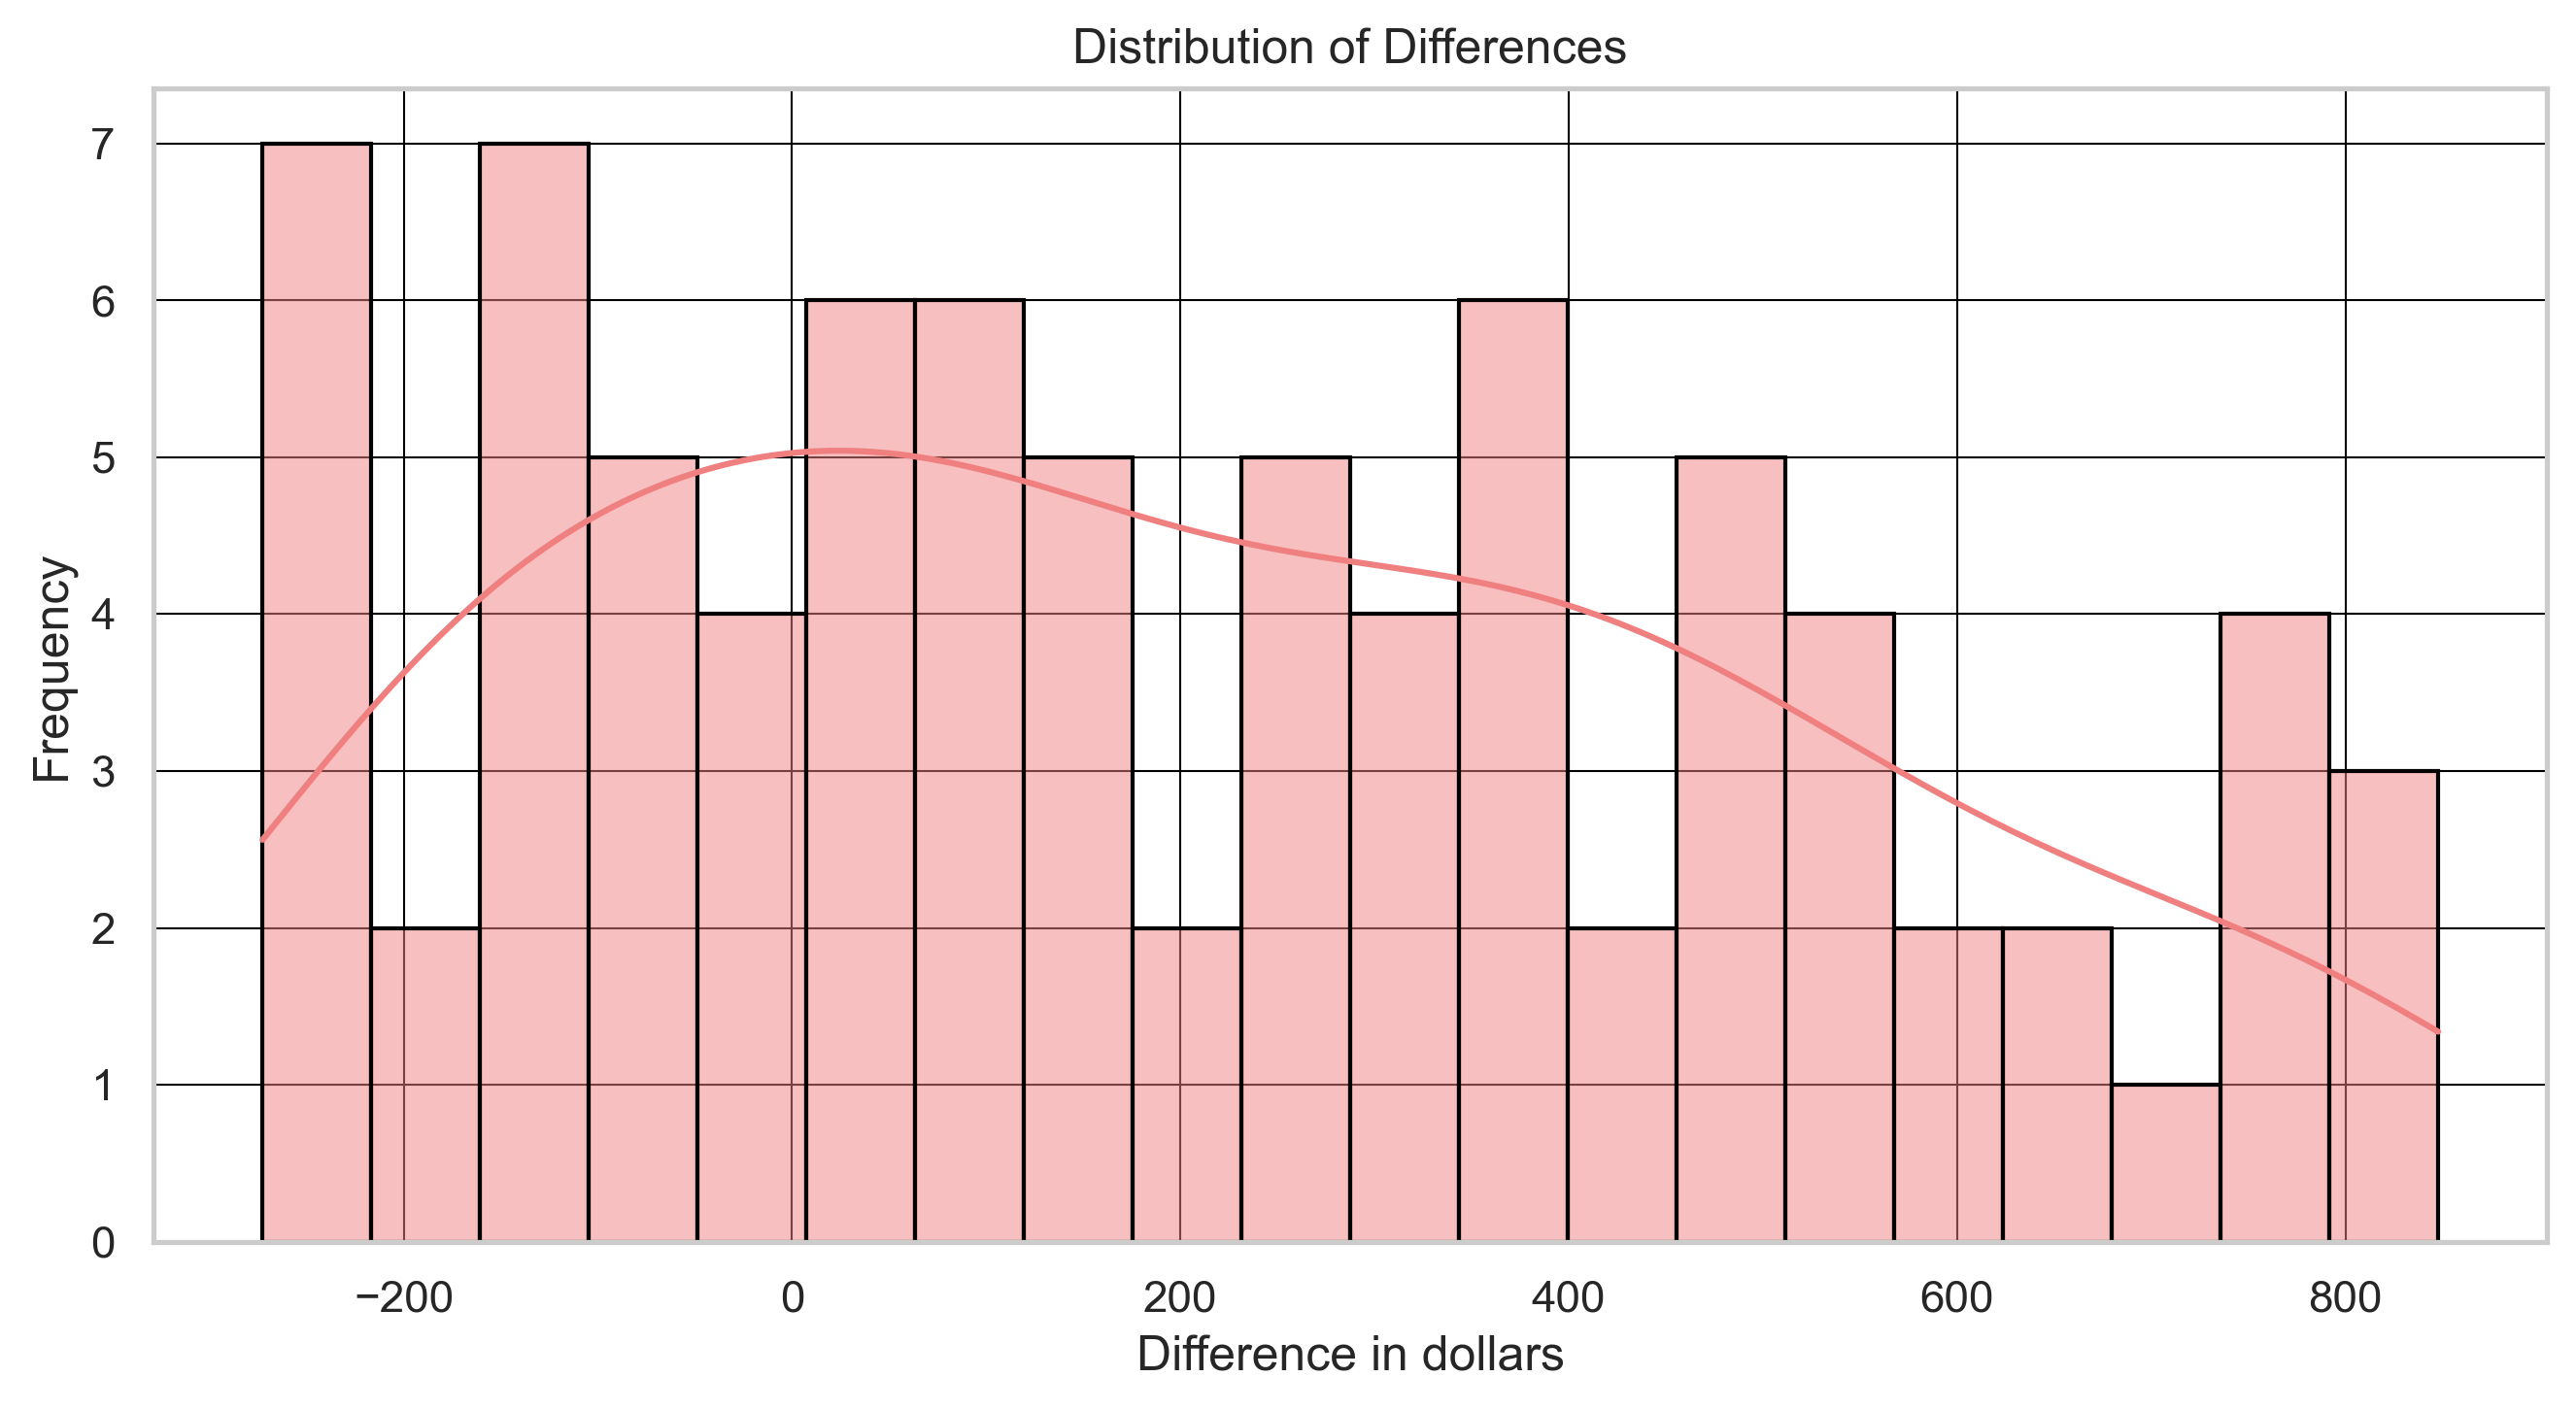

In [298]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(9, 5),dpi=300)
sns.histplot(df_spojeno2['DIFF'], bins=20,kde=True, color='lightcoral',edgecolor='black')
plt.title('Distribution of Differences')
plt.xlabel('Difference in dollars')
plt.ylabel('Frequency')
#tick_positions = np.arange(-250, df_spojeno2['DIFF'].max() + 100, 100) 
#plt.xticks(ticks=tick_positions, rotation=45)
plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='black')
plt.tight_layout()
plt.savefig('hist_carlton.png')

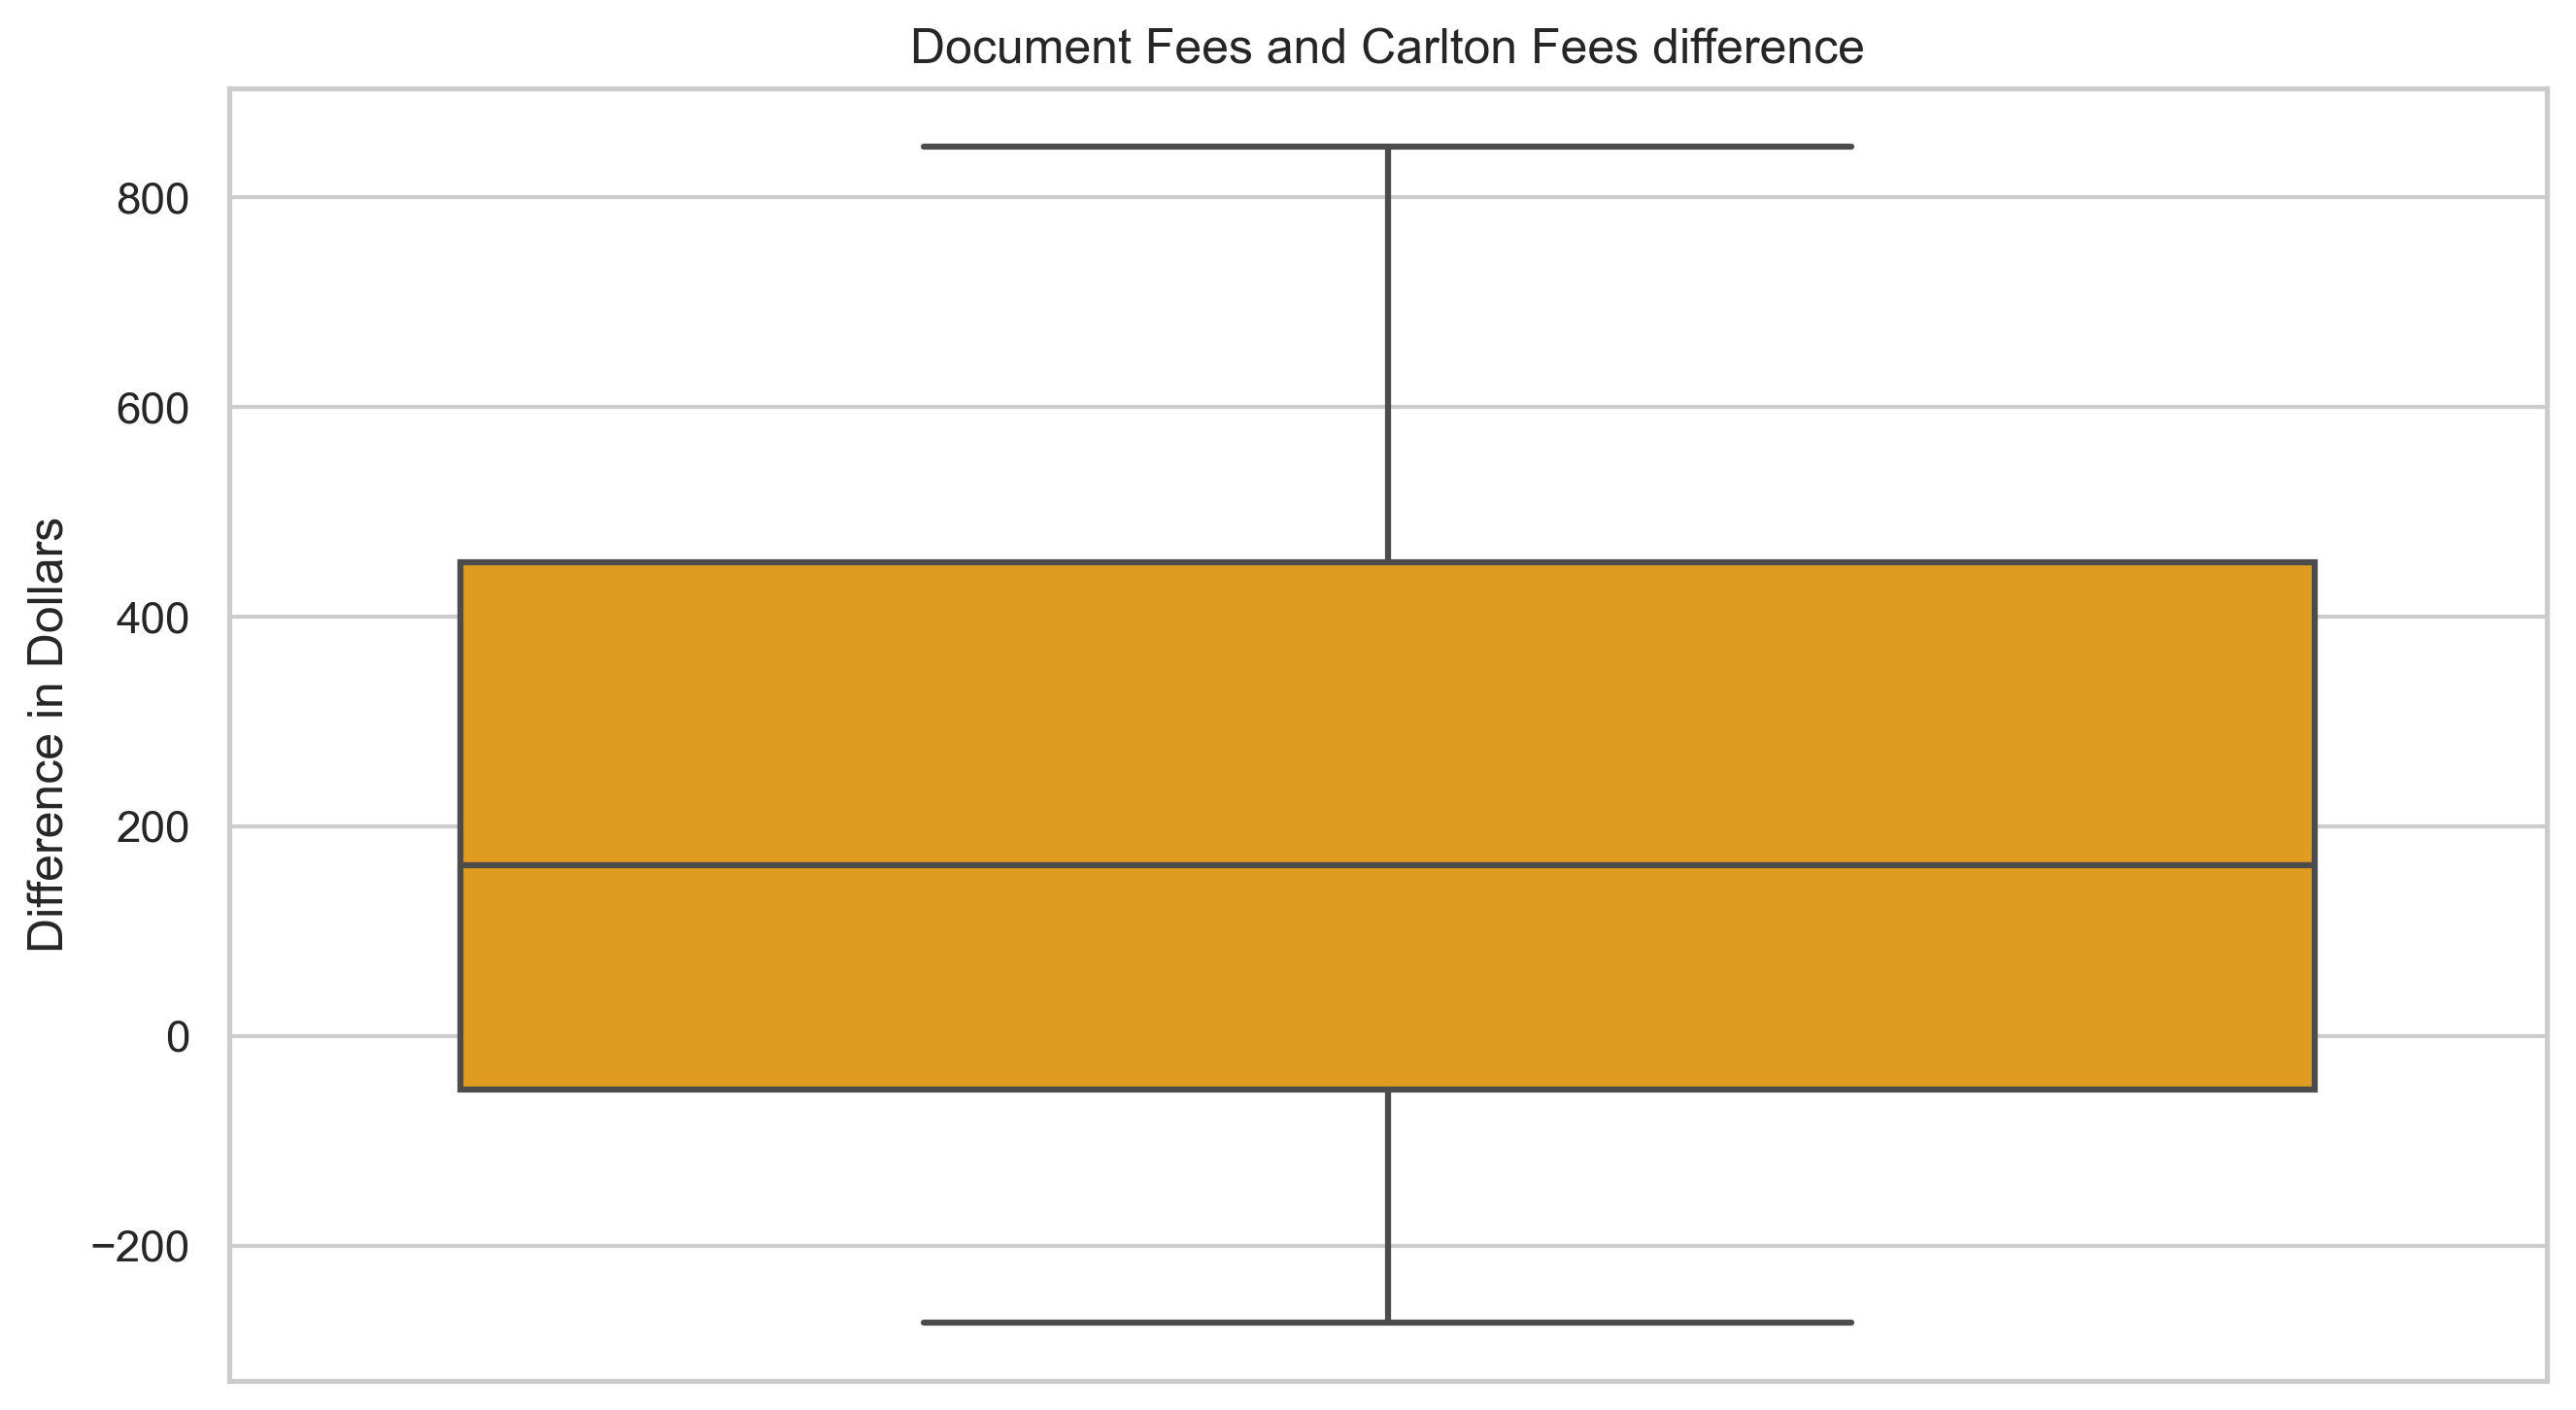

In [299]:
plt.figure(figsize=(9, 5),dpi=300)
sns.boxplot(y=df_spojeno2['DIFF'], color='orange')
plt.title('Document Fees and Carlton Fees difference')
plt.ylabel('Difference in Dollars')
plt.tight_layout()
plt.savefig('box_plot_carlton.png')

In [285]:
df_spojeno2['total_fees_carlton'].max()

644.0

In [277]:
df_spojeno2['total_fees_carlton'].min()

19.0

In [286]:
df_spojeno2['total_fees_docs'].max()

1092.0

In [278]:
df_spojeno2['total_fees_docs'].min()

0.0

In [280]:
df_spojeno2[df_spojeno2['total_fees_docs']==2114.0]

,AppId,total_fees_carlton,total_fees_docs,DIFF
0,7484527,644.0,2114.0,1470.0


In [282]:
df_spojeno2 = pd.read_csv('Tax and Fees Carlton - Sheet1.tsv',sep='\t')
df_spojeno2.dtypes

AppId                   int64
total_fees_carlton    float64
total_fees_docs        object
DIFF                  float64
dtype: object

In [283]:
df_spojeno2['total_fees_docs'] = df_spojeno2['total_fees_docs'].str.replace(',','').astype(float)

In [321]:
df_spojeno2['DIFF'].mean()

210.1064634146342

In [322]:
df_spojeno2['DIFF'].median()

162.66500000000002

In [301]:
df_taxes = pd.read_csv('Tax and Fees Carlton - Taxes.tsv',sep='\t')

In [307]:
df_taxes.dtypes

AppId                       int64
Sales_Tax                 float64
Carlton_tax_calculated    float64
DIFF                      float64
dtype: object

In [306]:
df_taxes['DIFF'] = df_taxes['DIFF'].str.replace(',','').astype(float)

In [308]:
df_taxes

,AppId,Sales_Tax,Carlton_tax_calculated,DIFF
0,7499705,1588.00,0.00,1588.00
1,7504171,926.00,0.00,926.00
2,7488695,458.82,0.00,458.82
3,7499951,920.00,806.33,113.67
4,7493692,372.45,263.82,108.63
...,...,...,...,...
77,7485610,0.00,599.80,-599.80
78,7486904,199.00,1059.70,-860.70
79,7483539,697.34,1798.11,-1100.77
80,7498600,0.00,1293.50,-1293.50


In [319]:
df_taxes['DIFF'].mean()

-100.61329268292684

In [320]:
df_taxes['DIFF'].median()

-59.4

In [323]:
df_taxes['DIFF'].max()

1588.0

In [325]:
df_taxes['Carlton_tax_calculated'].max()

2169.64

In [326]:
df_taxes['Sales_Tax'].max()

2069.9

In [311]:
df_taxes['DIFF'].min()

-1724.63

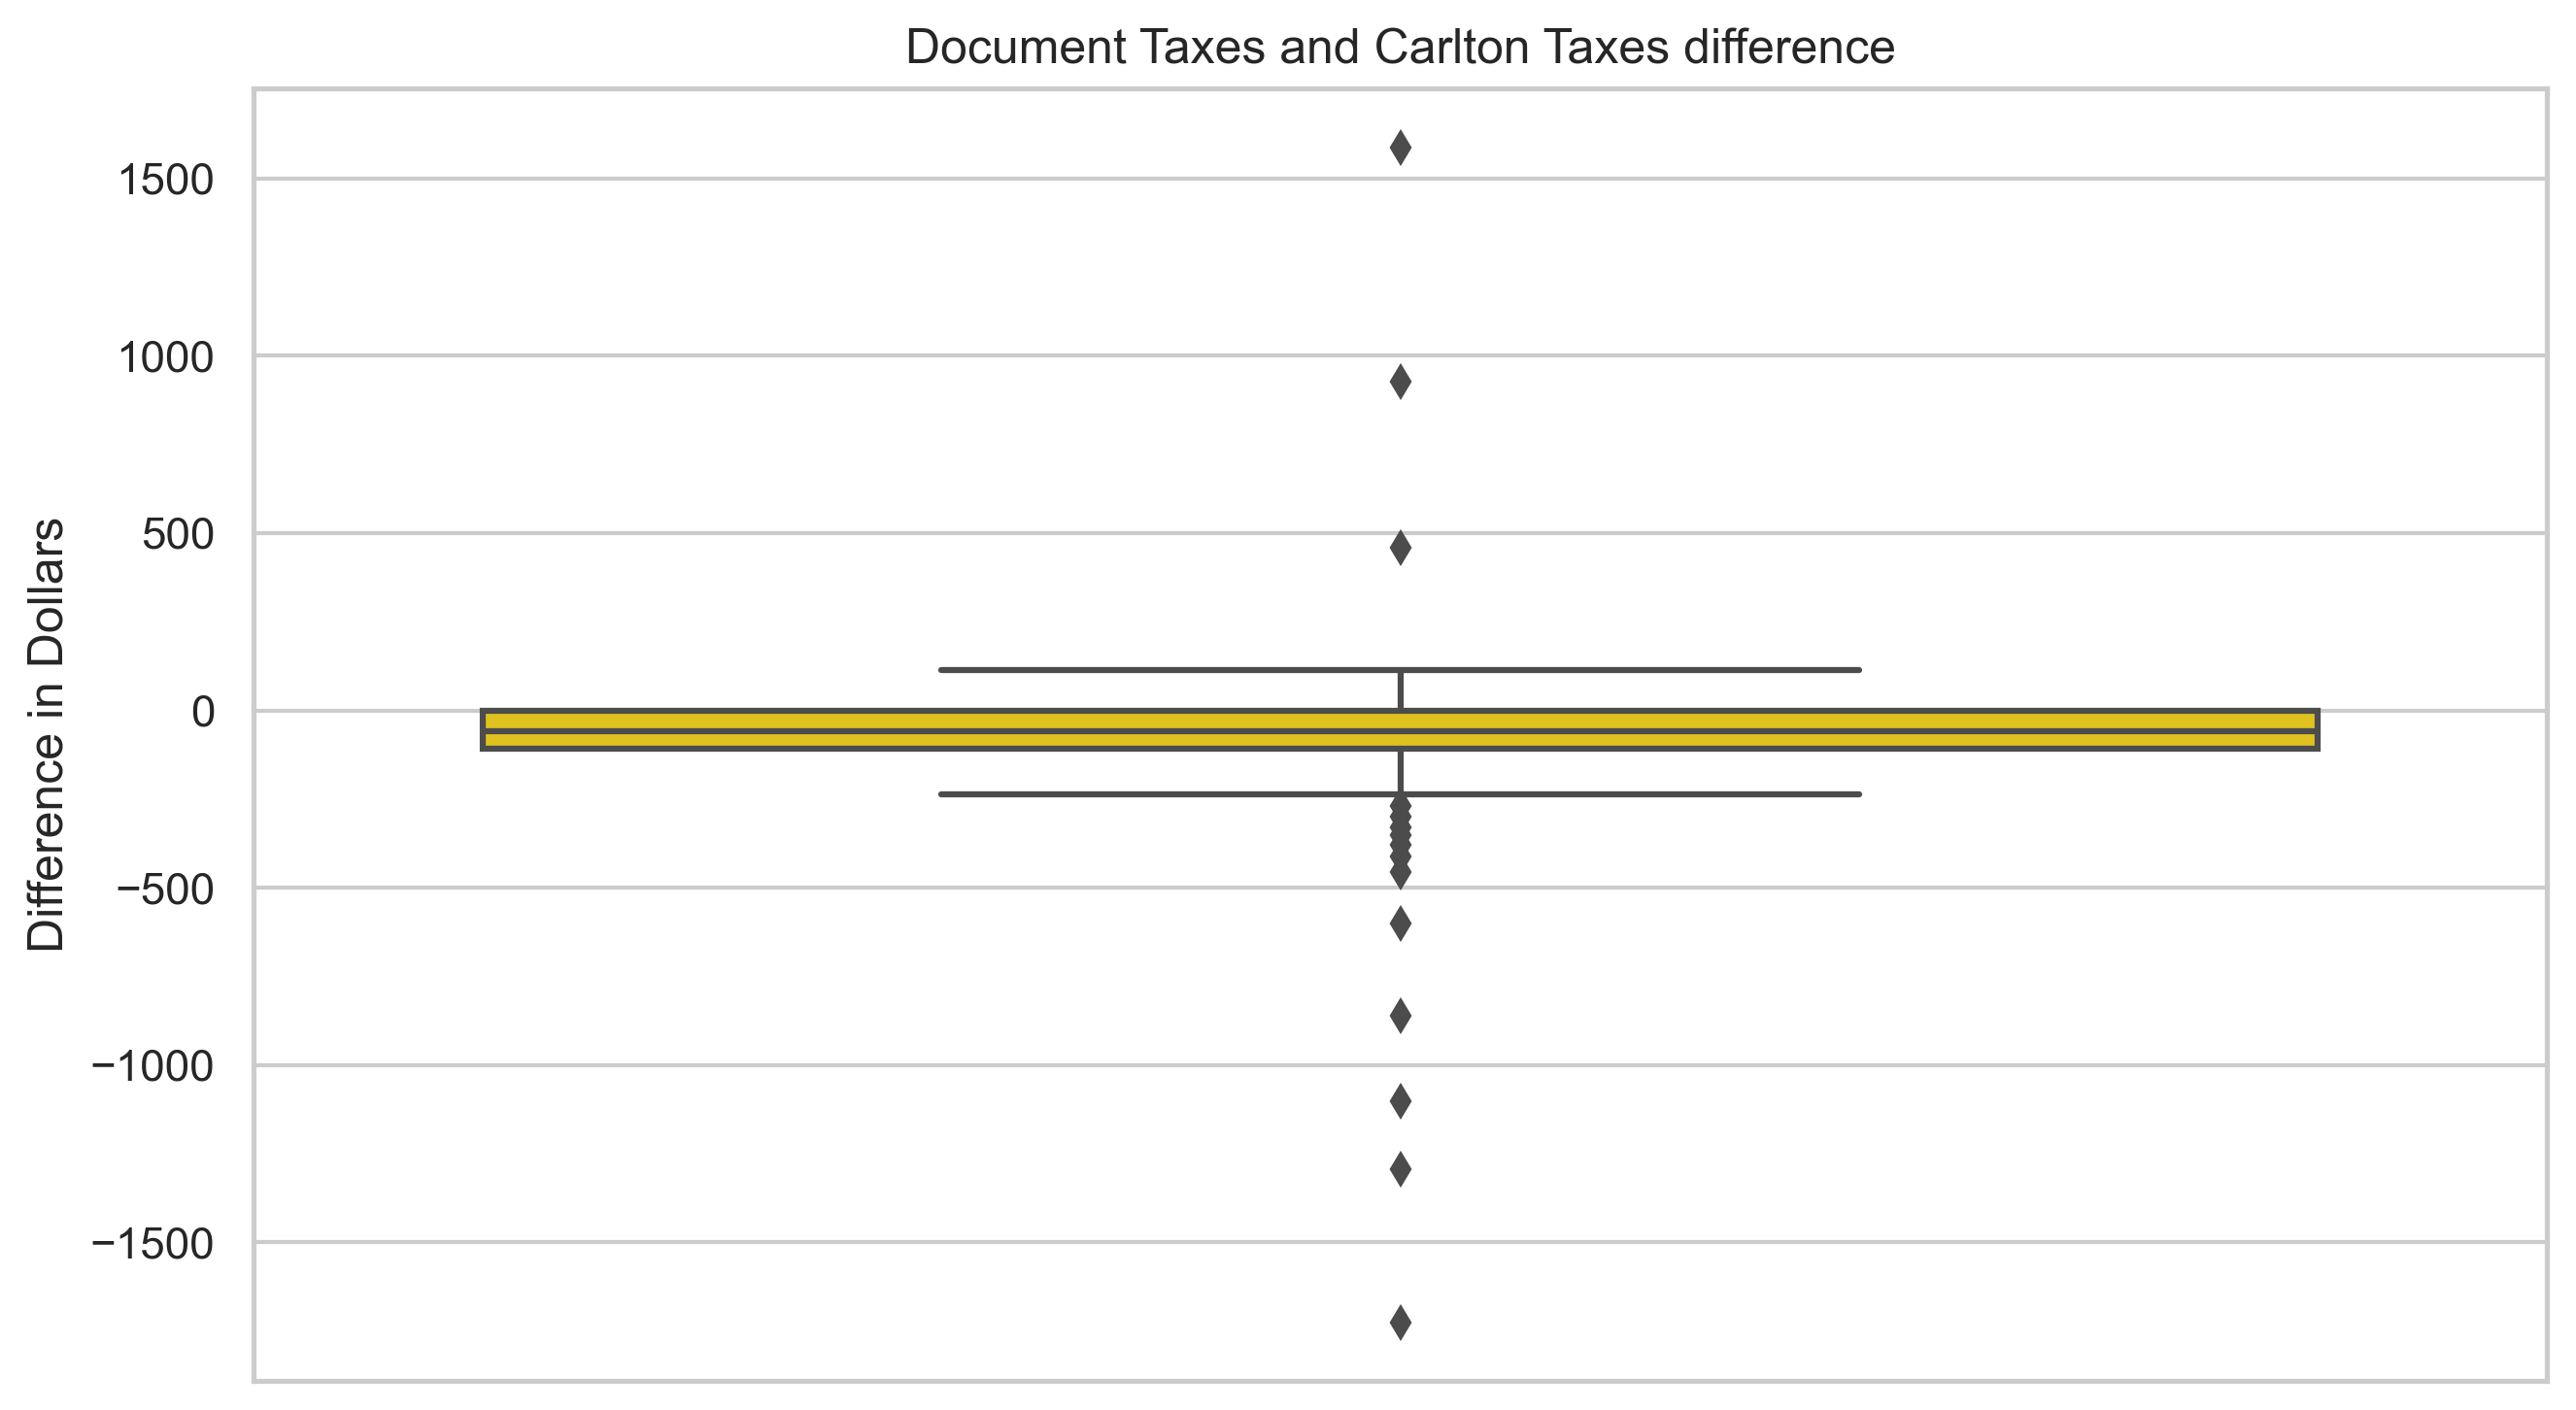

In [327]:
plt.figure(figsize=(9, 5),dpi=300)
sns.boxplot(y=df_taxes['DIFF'], color='gold')
plt.title('Document Taxes and Carlton Taxes difference')
plt.ylabel('Difference in Dollars')
plt.tight_layout()
plt.savefig('box_plot_carlton_taxes.png')

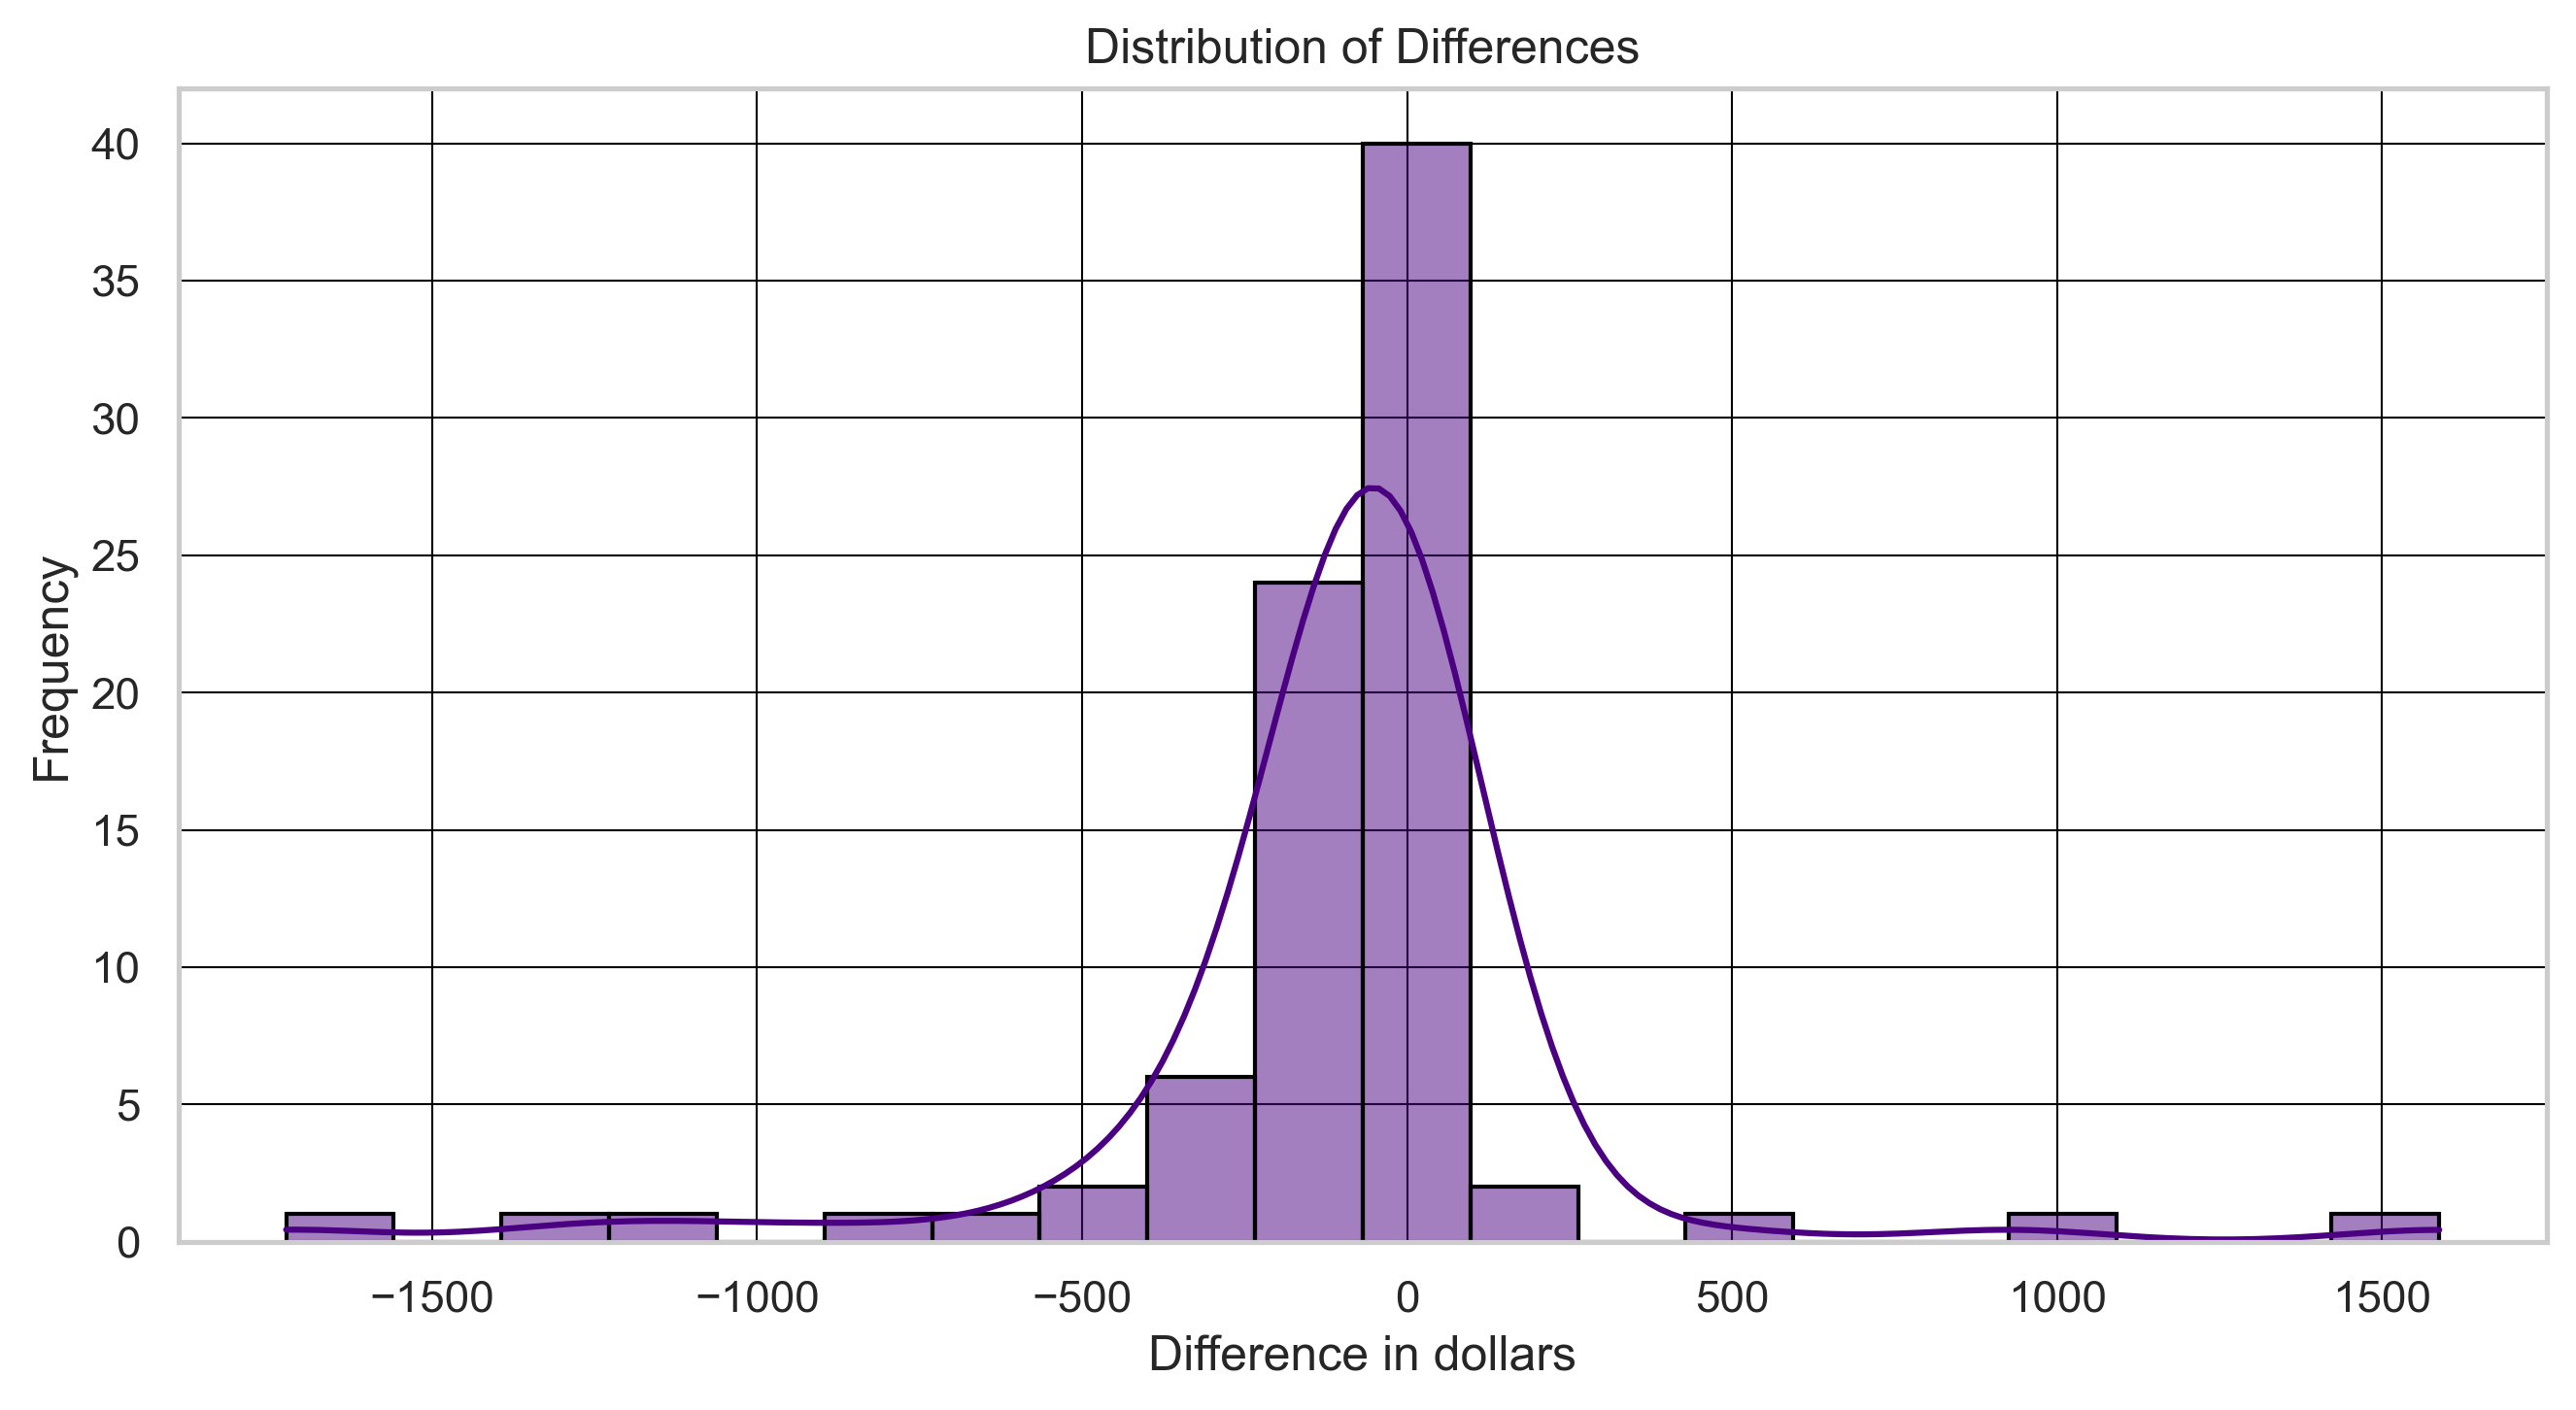

In [328]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(9, 5),dpi=300)
sns.histplot(df_taxes['DIFF'], bins=20,kde=True, color='indigo',edgecolor='black')
plt.title('Distribution of Differences')
plt.xlabel('Difference in dollars')
plt.ylabel('Frequency')
#tick_positions = np.arange(-250, df_spojeno2['DIFF'].max() + 100, 100)  
#plt.xticks(ticks=tick_positions, rotation=45)
plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='black')
plt.tight_layout()
plt.savefig('hist_carlton_taxes.png')